# Task3 - To Explore Unsupervised Machine Learning


# #Problem statment : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
# Importing the libraries

import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np

# #Load the iris dataset

In [3]:
iris = pd.read_csv(r"C:\Users\home\Desktop\SPARK\Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## #Removing the "id" column as it is not necessary

In [4]:
iris.drop(["Id"] ,axis = 1 , inplace = True)

In [5]:
iris.head(1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa


## #Check nulls 

In [6]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## #Check value counts of "Species"column

In [7]:
iris.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

# #Convert non-numeric column i.e "Species" to numeric 

In [8]:
iris.Species.replace({"Iris-versicolor":0 , "Iris-setosa":1 , "Iris-virginica":2} , inplace = True)

In [9]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


We dont have to do  sampling coz it is unsupervised

# #Kmeans

In [10]:
from sklearn.cluster import KMeans

# Finding the optimum number of clusters for k-means classification


In [11]:
df_iris = pd.DataFrame(iris)

In [12]:
x = df_iris.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

#  Plotting the results onto a line graph by Elbow plot

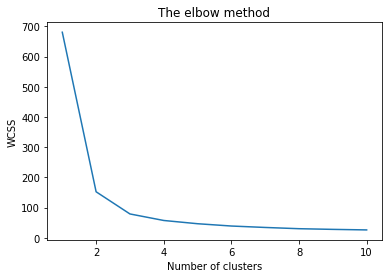

In [13]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

## The above plot is ELbow plot used to find the value of K in K-means, on x-axis ther are number of clusters and on y-axis there are sum of square(WCSS) 
### wherever i see the sudden drop i take that cluster as optimun number of cluster.
## Here the value of K is 3 

In [14]:
# Creating the kmeans classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# #Visualizing the clusters

<Figure size 720x720 with 0 Axes>

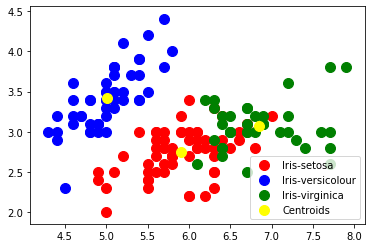

<Figure size 720x720 with 0 Axes>

In [18]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
